In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader , TensorDataset 
import torch
from torch import nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import torch.nn.init as init


## Loading images to Pytorch

In [2]:
from torchvision.datasets import ImageFolder
from torchvision import transforms


train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])
dataset_train = ImageFolder(
    "training_set",
    transform=train_transforms
)


## Displaying Images

In [3]:
dataloader_train = DataLoader(
    dataset_train,
    shuffle=True,
    batch_size=1,
)

image, label = next(iter(dataloader_train))
print(image.shape)

image = image.squeeze().permute(1, 2, 0)
print(image.shape)


torch.Size([1, 3, 128, 128])
torch.Size([128, 128, 3])


c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


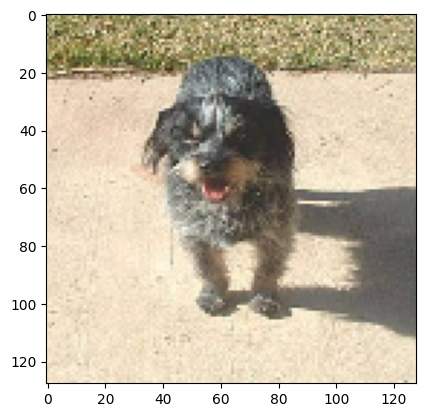

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

## Data Augmentation

In [5]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
    "training_set",
    transform=train_transforms,
)

In [6]:
test_transforms = transforms.Compose([
#
# NO DATA AUGMENTATION AT TEST TIME
#
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
])

dataset_test = ImageFolder(
    "test_set",
    transform=test_transforms
)


## CNN

In [7]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        # Adding a Flatten layer outside of Sequential
        self.flatten = nn.Flatten()
        
        # Define the classifier layer with dynamic input size
        self.classifier = nn.Linear(64 * 32 * 32, num_classes)  # For 128x128 inputs

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.flatten(x)  # Manually flatten the output
        x = self.classifier(x)
        return x


In [8]:
# class Net(nn.Module):
#     def __init__(self, num_classes):
#         super().__init__()
#         self.feature_extractor = nn.Sequential(
#             nn.Conv2d(3, 32, kernel_size=3, padding=1),
#             nn.ELU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Conv2d(32, 64, kernel_size=3, padding=1),
#             nn.ELU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Flatten()
# )
#         self.classifier = nn.Linear(64*16*16, num_classes)

#     def forward(self, x):
#         x = self.feature_extractor(x)
#         # x = x.view(x.size(0), -1)  # Flatten the tensor
#         x = self.classifier(x)
#         return x
    
    

## Image classifier training loop

In [9]:
net = Net(num_classes=2)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

KeyboardInterrupt: 

## Averaging multi-class metrics

In [ ]:
# from torchmetrics import Recall

# recall_per_class = Recall(task="multiclass", num_classes=7, average=None)
# recall_micro = Recall(task="multiclass", num_classes=7, average="micro")
# recall_macro = Recall(task="multiclass", num_classes=7, average="macro")
# recall_weighted = Recall(task="multiclass", num_classes=7, average="weighted")

## Evaluation loop

In [ ]:
# from torchmetrics import Precision, Recall

# metric_precision = Precision(task="multiclass", num_classes=7, average="macro")
# metric_recall = Recall(task="multiclass", num_classes=7, average="macro")

# net.eval()
# with torch.no_grad():
#     for images, labels in dataloader_test:
#         outputs = net(images)
#         _, preds = torch.max(outputs, 1)
#         metric_precision(preds, labels)
#         metric_recall(preds, labels)

# precision = metric_precision.compute()
# recall = metric_recall.compute()

In [ ]:
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")

## Analyzing performance per class

In [ ]:
# metric_recall = Recall(task="multiclass", num_classes=7, average=None)
# net.eval()
# with torch.no_grad():
#     for images, labels in dataloader_test:
#         outputs = net(images)
#         _, preds = torch.max(outputs, 1)
#         metric_recall(preds, labels)

# recall = metric_recall.compute()

In [ ]:
# print(recall)
# dataset_test.class_to_idx

In [ ]:
# {
#     k: recall[v].item()
#     for k, v
#     in dataset_test.class_to_idx.items()
# }